<a href="https://colab.research.google.com/github/syedayazsa/2CC-Wildlife-Strikes/blob/master/wildlife_strikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **18BCE0660**
# **SYED AYAZ IMAM**

In [0]:
!pip install -q kaggle

In [32]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
token = {"username":"syedayazsa","key":"d518033a89612262d35a3c61cecdcba2"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [35]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!kaggle datasets download -d faa/wildlife-strikes

- path is now set to: {/content}
wildlife-strikes.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
dataset = pd.read_csv('/content/{/content}/datasets/faa/wildlife-strikes/wildlife-strikes.zip', compression = 'zip', sep = ',')
dataset.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,34.0,40,2.0,D,1,1.0,NaN,NaN,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,NaN,CLIMB,NaN,NaN,NaN,NaN,NaN,NE1,GULL,1,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,34.0,10,2.0,D,5,5.0,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,TAKEOFF RUN,NaN,NaN,0.0,NaN,0.0,ZZ201,HOUSE SPARROW,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,NaN,NaN,NaN,0.0,R1101,BARN OWL,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,22.0,NaN,2.0,D,NaN,NaN,NaN,NaN,KMYR,MYRTLE BEACH INTL,SC,ASO,NaN,APPROACH,DAY,NaN,200.0,138.0,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,NaN,CLIMB,DAY,NaN,100.0,200.0,NaN,ZX,FINCH,1,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
dataset.describe()

,Record ID,Incident Year,Incident Month,Incident Day,Aircraft Mass,Engine Make,Engines,Engine2 Position,Engine4 Position,Height,Speed,Distance,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
count,174104.000000,174104.000000,174104.000000,174104.000000,127320.000000,123434.000000,127342.000000,118715.000000,3092.000000,103677.000000,71258.000000,99713.000000,565.000000,229.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000,174104.000000
mean,241204.036915,2006.036392,7.171840,15.712264,3.510611,21.306958,2.057656,2.918570,2.058538,831.032283,141.925622,0.703738,0.046018,1.746725,0.085977,0.107757,0.009150,0.138934,0.005956,0.122369,0.006577,0.055605,0.014445,0.045168,0.011619,0.003182,0.000971,0.001918,0.000425,0.055180,0.020086,0.003326,0.119159,0.024009,0.102703,0.004733,0.046242,0.005813,0.011235,0.004176,0.005962,0.004216,0.090727,0.008989
std,94013.682213,6.747708,2.790152,8.799405,0.873783,11.023161,0.469374,2.008204,1.441000,1803.650833,46.905651,3.464467,0.435164,6.571239,0.280331,0.310075,0.095216,0.345879,0.076947,0.327713,0.080829,0.229157,0.119318,0.207674,0.107166,0.056320,0.031141,0.043758,0.020612,0.228331,0.140294,0.057572,0.323976,0.153076,0.303571,0.068633,0.210010,0.076019,0.105397,0.064485,0.076983,0.064793,0.287222,0.094383
min,1000.000000,1990.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,205411.750000,2001.000000,5.000000,8.000000,3.000000,10.000000,2.000000,1.000000,1.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,249102.500000,2007.000000,8.000000,16.000000,4.000000,22.000000,2.000000,1.000000,1.000000,50.000000,138.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,322592.250000,2012.000000,9.000000,23.000000,4.000000,34.000000,2.000000,5.000000,4.000000,800.000000,160.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,367445.000000,2015.000000,12.000000,31.000000,5.000000,92.000000,4.000000,7.000000,5.000000,31300.000000,2500.000000,150.000000,8.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

In [39]:
dataset.shape

(174104, 66)

In [40]:
dataset.dtypes

Record ID          int64
Incident Year      int64
Incident Month     int64
Incident Day       int64
Operator ID       object
                   ...  
Tail Damage        int64
Lights Strike      int64
Lights Damage      int64
Other Strike       int64
Other Damage       int64
Length: 66, dtype: object

In [0]:
dataset.isnull().sum().head(10)
dataset = dataset.dropna(thresh=8)

In [42]:
dataset.isnull().sum().head(10)

Record ID             0
Incident Year         0
Incident Month        0
Incident Day          0
Operator ID           0
Operator              0
Aircraft              0
Aircraft Type     41030
Aircraft Make     43053
Aircraft Model    51665
dtype: int64

In [43]:
sum(dataset.duplicated()) #no columns to drop

0

# **EXPLORATORY DATA ANALYSIS**

Text(0, 0.5, 'Damage frequency')

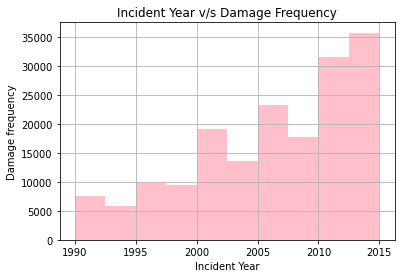

In [44]:
dataset["Incident Year"].hist(color = 'pink')
plt.title('Incident Year v/s Damage Frequency')
plt.xlabel("Incident Year")
plt.ylabel("Damage frequency")

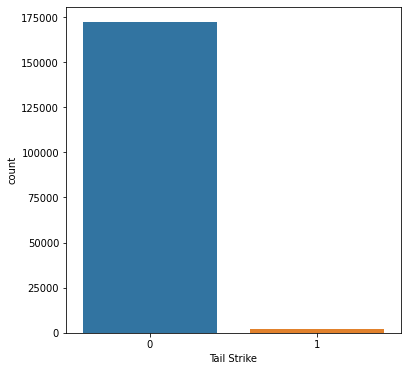

In [45]:
plt.figure(figsize=(6,6)) 
sns.countplot(x='Tail Strike',data=dataset)

**From the graph, it can be observed that year by year, the number of birdstrikes is increasing**

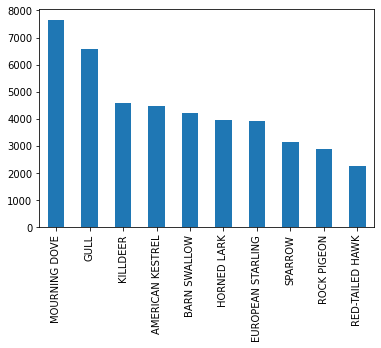

In [46]:
species_name = (dataset[~dataset['Species Name'].isin(['UNKNOWN MEDIUM BIRD', 'UNKNOWN SMALL BIRD','UNKNOWN LARGE BIRD', 'UNKNOWN BIRD'])])                             
species_name['Species Name'].value_counts().head(10).plot.bar()

**The Mourning Dove is responsible for most number of strikes (about 7500) followed by gull and Killdeer**

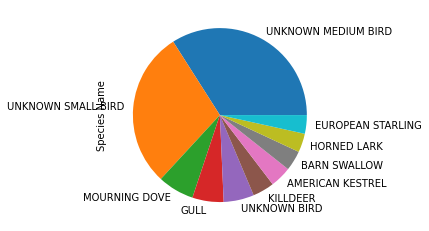

In [47]:
dataset['Species Name'].value_counts(ascending = False).head(10).plot.pie()

**From the pie chart, it can be observed that the bird names were not noted for most of the strikes.**

In [0]:
minidata = pd.DataFrame(dataset.iloc[:,56:66])
col = list(minidata.columns)
minidata = pd.DataFrame(minidata.apply(pd.Series.value_counts), columns=col)

In [119]:
minidata['Fuselage'] = minidata ['Fuselage Strike'] + minidata['Fuselage Damage']
minidata['Landing Gear'] = minidata ['Landing Gear Strike'] + minidata['Landing Gear Damage']
minidata['Tail'] = minidata ['Tail Strike'] + minidata['Tail Damage']
minidata['Lights'] = minidata ['Lights Strike'] + minidata['Lights Damage']
minidata['Other'] = minidata ['Other Strike'] + minidata['Other Damage']
minidata.drop(col, axis = 1)

,Fuselage,Landing Gear,Tail,Lights,Other
0,329503,339145,345525,346436,330847
1,18705,9063,2683,1772,17361


**From the above dataframe it can be observed that Fuselage was the most impacted part of the aircraft due to birdstrikes**

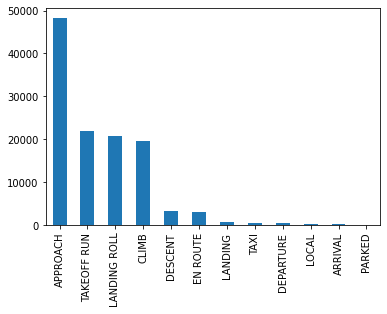

In [48]:
dataset['Flight Phase'].value_counts().plot.bar()

**The above var graph suggests that most of the accidents happened when the altitute was low. It is observed that most of accidents happened during approach, takeoff and landing.**

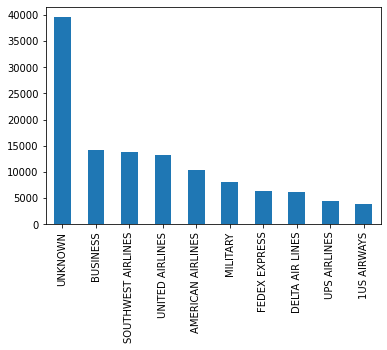

In [49]:
dataset['Operator'].value_counts(ascending = False).head(10).plot.bar()

**Most of accidents happened with unknown carriers, followed by business aircrafts. When it comes to passenger aircrafts, Southwest Airlines, United Airlines and Americann Airlines were in top three.**

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

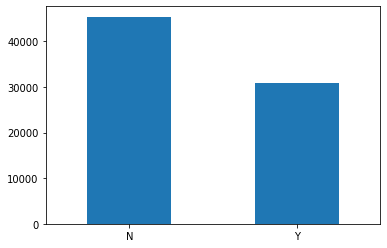

In [50]:
warning_column = dataset[dataset['Warning Issued'].isin(['y','n','Y','N'])] ['Warning Issued']
warning_column.map(lambda x: x.upper()).value_counts(ascending = False).head(10).plot.bar()
plt.xticks(rotation=360)

**It is evident that there was no warning issued to most of the airlines about the birds**

# **WE CAN DROP THE NA VALUES TO GET A BETTER VISUALIZATION (IMPORTING THE DATA ONCE AGAIN)**

In [58]:
dataset = pd.read_csv('/content/{/content}/datasets/faa/wildlife-strikes/wildlife-strikes.zip', compression = 'zip', sep = ',', low_memory= False, 
                      na_values = ['unknown', 'unk'], na_filter = True, skip_blank_lines = True)
dataset.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,34.0,40,2.0,D,1,1.0,NaN,NaN,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,NaN,CLIMB,NaN,NaN,NaN,NaN,NaN,NE1,GULL,1,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,34.0,10,2.0,D,5,5.0,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,TAKEOFF RUN,NaN,NaN,0.0,NaN,0.0,ZZ201,HOUSE SPARROW,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,NaN,NaN,NaN,0.0,R1101,BARN OWL,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,22.0,NaN,2.0,D,NaN,NaN,NaN,NaN,KMYR,MYRTLE BEACH INTL,SC,ASO,NaN,APPROACH,DAY,NaN,200.0,138.0,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,NaN,CLIMB,DAY,NaN,100.0,200.0,NaN,ZX,FINCH,1,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
corr_matrix = dataset.corr()
print(corr_matrix)

                      Record ID  Incident Year  ...  Other Strike  Other Damage
Record ID              1.000000       0.859320  ...      0.106018     -0.030642
Incident Year          0.859320       1.000000  ...      0.107612     -0.049188
Incident Month        -0.004835      -0.031945  ...     -0.008582     -0.004121
Incident Day           0.004243       0.003285  ...      0.004439     -0.000295
Aircraft Mass          0.044724       0.047271  ...     -0.047194     -0.110565
Engine Make           -0.230940      -0.229563  ...     -0.045633     -0.021239
Engines               -0.129891      -0.091497  ...     -0.046070     -0.059369
Engine2 Position      -0.130793      -0.124035  ...      0.030792      0.021520
Engine4 Position      -0.158341       0.342613  ...      0.057082     -0.031502
Height                 0.050186       0.029960  ...     -0.093674      0.008500
Speed                  0.037065       0.053423  ...     -0.050414     -0.017467
Distance               0.070100       0.

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


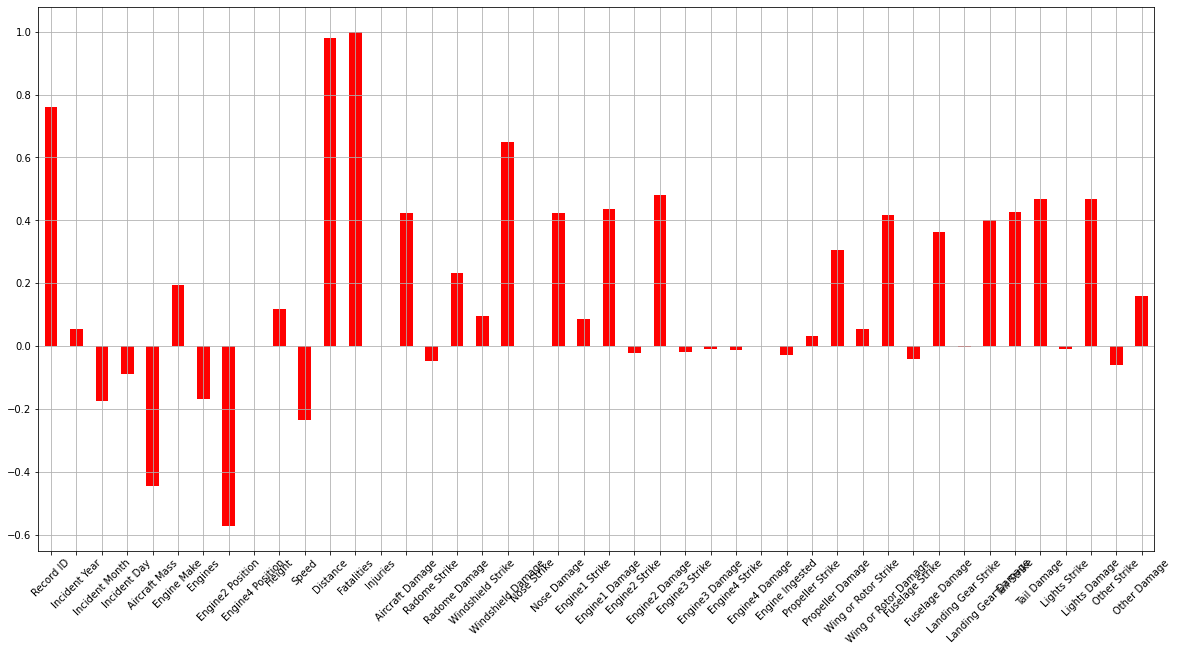

In [62]:
plt.figure(figsize=(20,10))
dataset.corrwith(dataset['Fatalities']).plot.bar(color='r',grid=True,rot=45)

# **DROPPING HIGHLY CORRELATED COLUMNS**

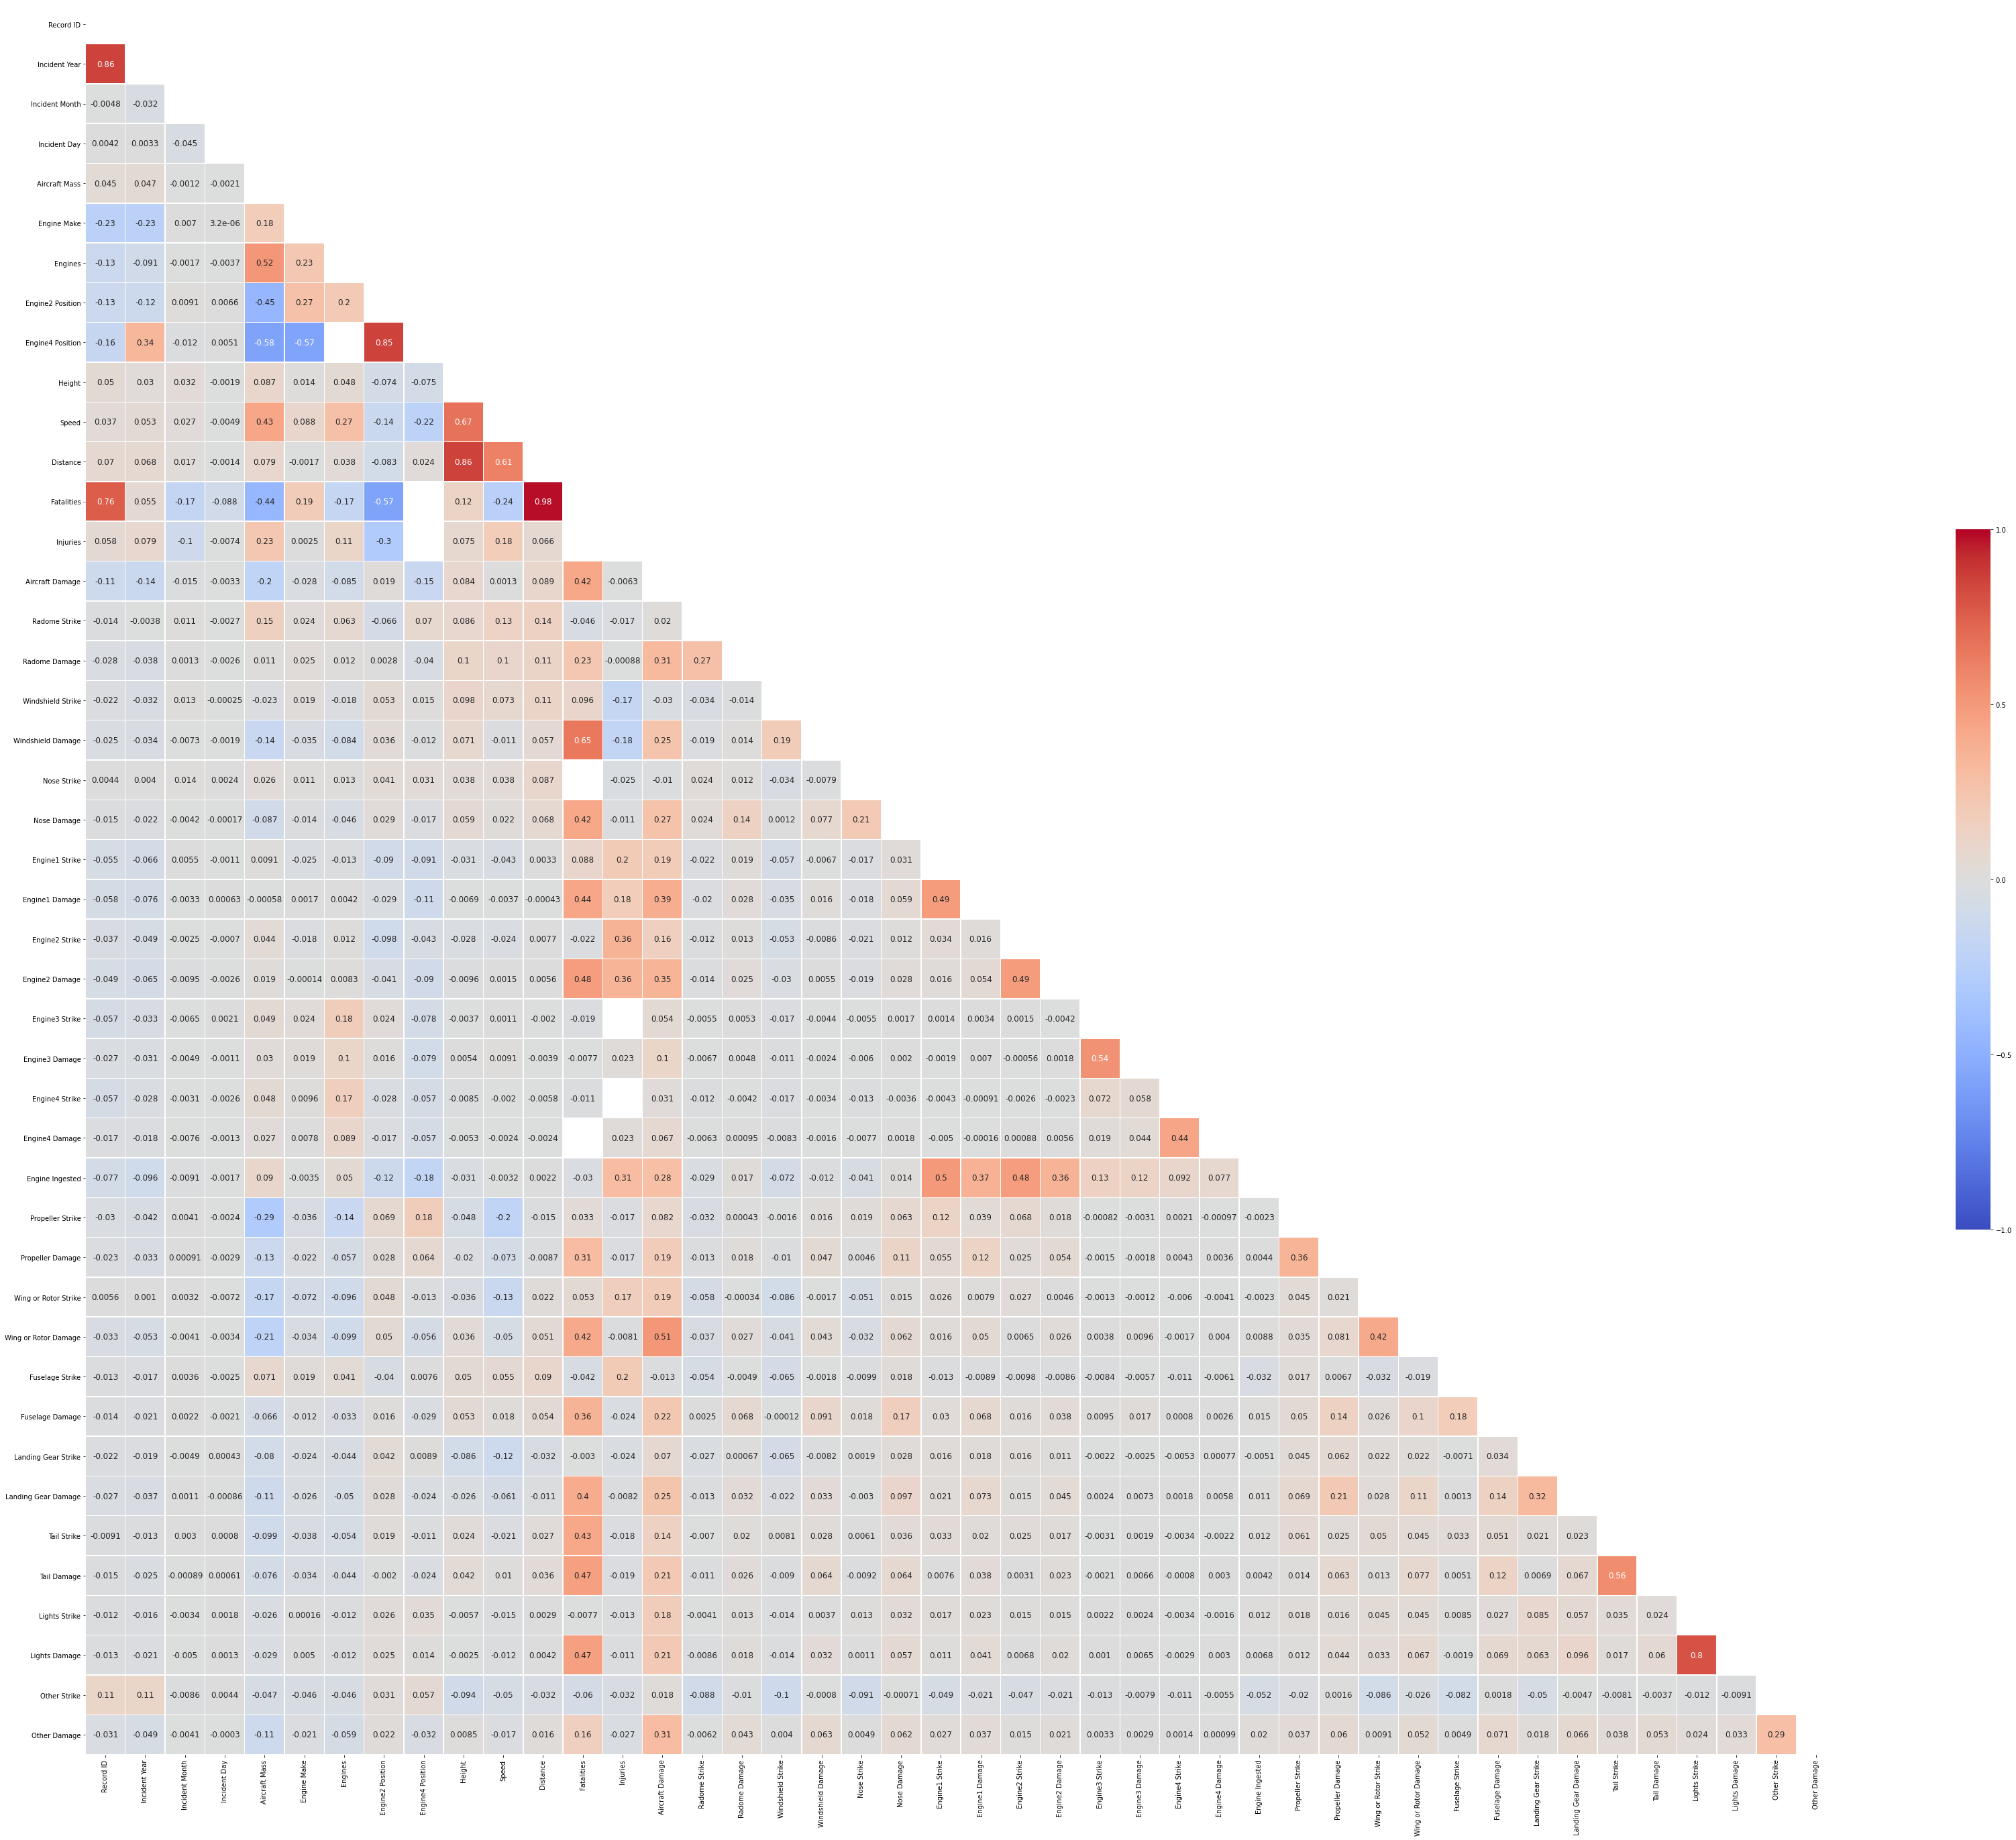

In [53]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(64, 48)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [0]:
plt.figure(figsize=(20,10))
df.corrwith(df['Class']).plot.bar(color='r',grid=True,rot=45)

In [0]:
def corr_drop(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]

    print(col_corr)

In [55]:
corr_drop(dataset, 0.8) #chosen threshold  = 0.8

{'Lights Damage', 'Engine4 Position', 'Incident Year', 'Distance'}
